# [Lab Session 4](deconvolution.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

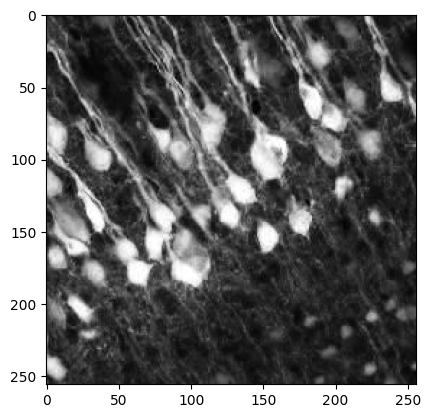

In [2]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [ ]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2
img_psf = conv(img, psf, mode = "same", boundary = "symm")

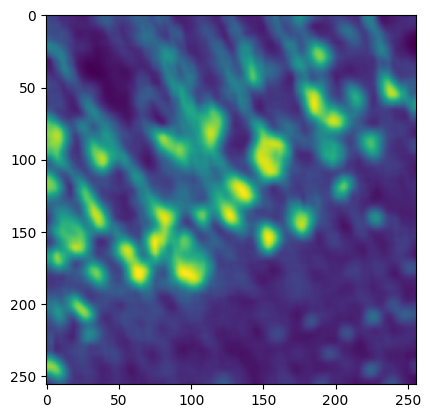

In [31]:
plt.imshow(img_psf)

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

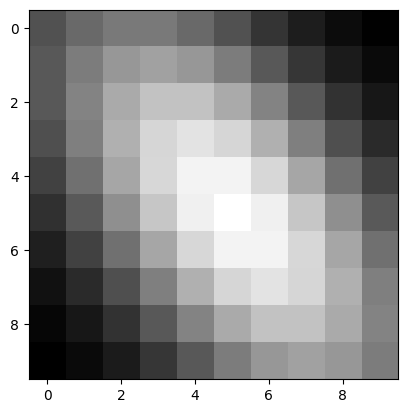

In [32]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

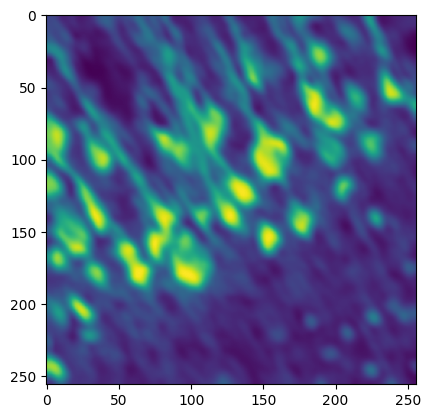

In [25]:
psf_gau = create_psf(10)
img_psf_gau = conv(img, psf_gau, mode = "same", boundary = "symm")
plt.imshow(img_psf_gau)


**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [33]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    for x in range(n_iterations):
        P = psf
        img_deconv = img_deconv*(conv(img/conv(img_deconv, P , mode = "same", boundary = "symm"), np.flip(P) , mode="same", boundary="symm"))

    ### Insert code here
    
    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

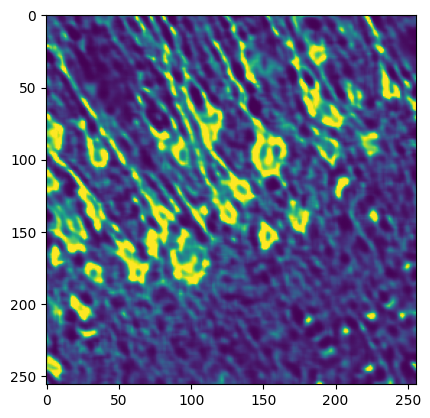

In [41]:
deconv_img = richardson_lucy_deconvolution(psf_conv, create_psf(10), 20)
plt.imshow(deconv_img)

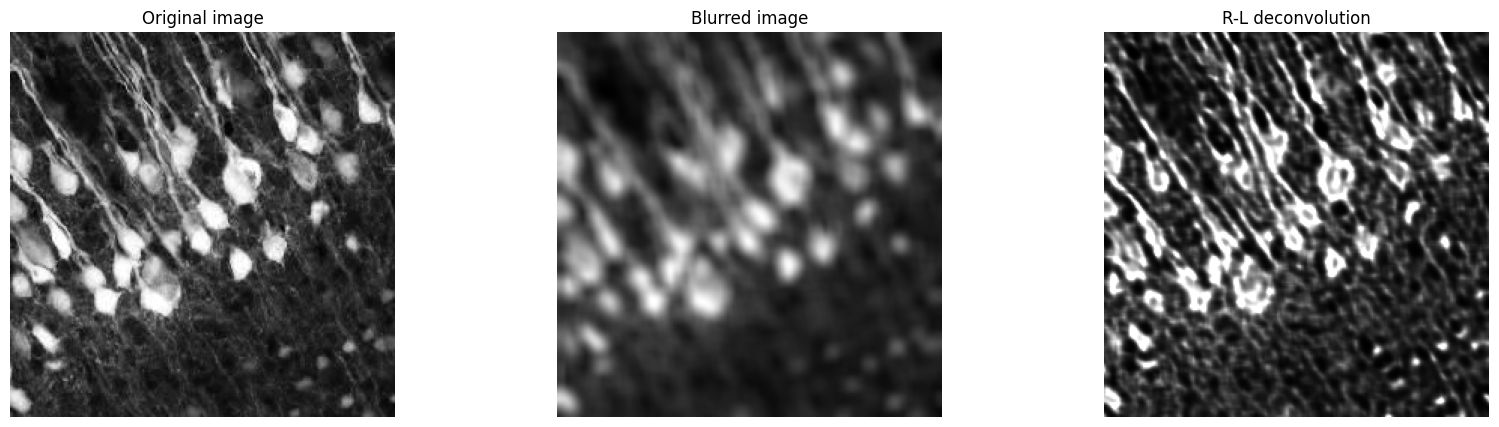

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_psf, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(deconv_img, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [37]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

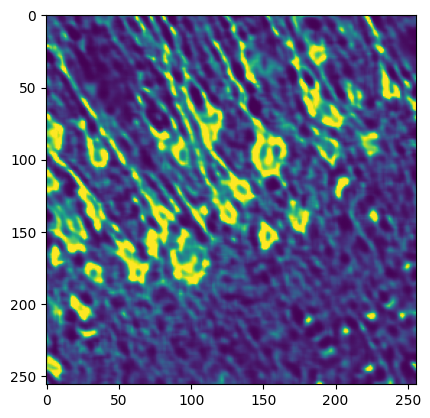

In [47]:
noise_img = img + noise
noise_img
#plt.imshow(noise_img)
#plt.colorbar()
deconv_img = richardson_lucy_deconvolution(noise_img, create_psf(10), 20)
plt.imshow(deconv_img)

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

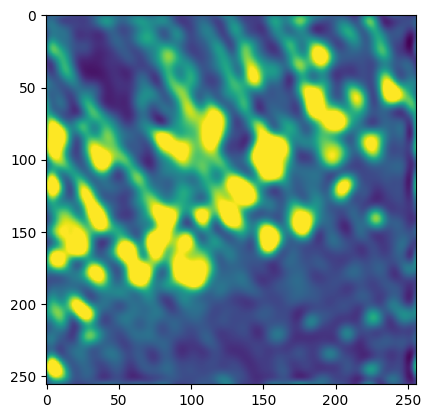

In [52]:
f = 10

psf = create_psf(f)
img_wiener = wiener(img_psf, psf, balance=2, clip=True)
plt.imshow(img_wiener)

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

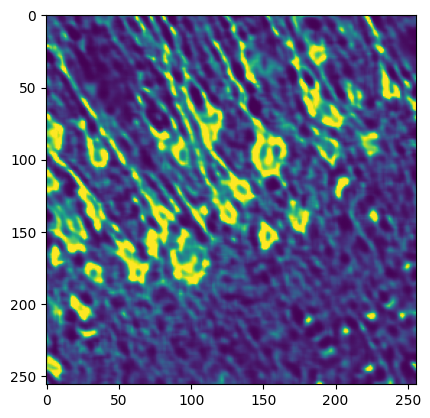

In [66]:
f = 100

psf = create_psf(f)

#4
#deconv_img = richardson_lucy_deconvolution(psf_conv, psf, 20)
#plt.imshow(deconv_img)

#5
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor
noise_img = img + noise
noise_img
deconv_img = richardson_lucy_deconvolution(noise_img, create_psf(10), 20)
plt.imshow(deconv_img)

#6

img_wiener = wiener(img_psf, psf, balance=2, clip=True)
#plt.imshow(img_wiener)



**[Task 8.]()** Use a wrong PSF to restore the image

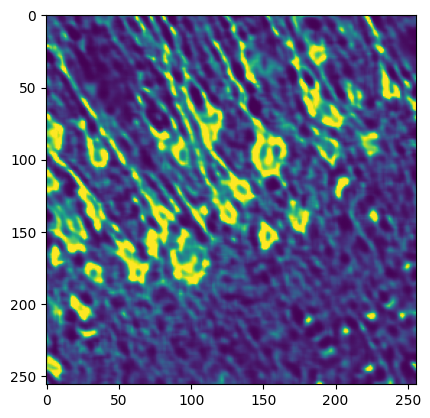

In [70]:
psf = create_psf(10)
img_wrong = richardson_lucy_deconvolution(img_psf, psf_gau, 20)
plt.imshow(img_wrong)

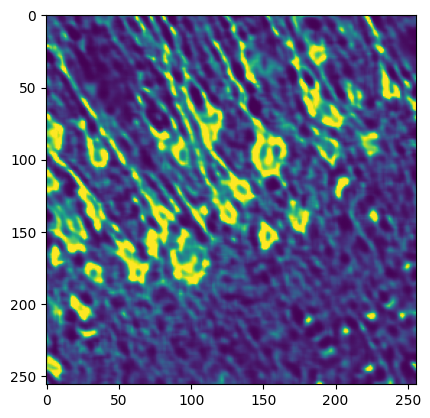

In [71]:
psf = psf_gau
img_wrong = richardson_lucy_deconvolution(img_psf, create_psf(10), 20)
plt.imshow(img_wrong)